In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sn
import statsmodels.formula.api as snf

import ipywidgets as widgets
from ipywidgets import interact, fixed

In [66]:
url = 'https://raw.githubusercontent.com/PaulaEsteban2000/CSE151A_UrbanAnimals/main/preprocessed_df.csv'
df = pd.read_csv(url, index_col=0)
df.head(2)


,lat,long,BIRD,CAT,DOG,EXOTIC,FOWL,LIVESTOCK,OTHER,REPTILE,...,POOR,SUMMER,SPRING,FALL,WINTER,NORMAL,FRIENDLY,NERVOUS,DANGEROUS,SCARED
0,30.494640,-91.15616,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,1,0,0,0
1,30.431417,-91.14107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,1,0,0,0,0


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y = df[['NORMAL', 'FRIENDLY', 'NERVOUS', 'DANGEROUS', 'SCARED']]
x = df.drop(['NORMAL', 'FRIENDLY', 'NERVOUS', 'DANGEROUS', 'SCARED'], axis=1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

logistic_model = MultiOutputClassifier(LogisticRegression())
logistic_model.fit(xtrain, ytrain)
logistic_predictions = logistic_model.predict(xtest)

accuracy = accuracy_score(ytest, logistic_predictions)
matrix = confusion_matrix(ytest.values.flatten(), logistic_predictions.flatten())
report = classification_report(ytest.values.flatten(), logistic_predictions.flatten())

print("Accuracy:" , accuracy)
print("Confusion Matrix:",matrix)
print("Classification Report:", report)

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy: 0.30089965397923873
Confusion Matrix: [[28145   755]
 [ 5047  2178]]
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.97      0.91     28900
           1       0.74      0.30      0.43      7225

    accuracy                           0.84     36125
   macro avg       0.80      0.64      0.67     36125
weighted avg       0.83      0.84      0.81     36125



C:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense

from sklearn import datasets
from sklearn.model_selection import train_test_split

In [13]:
def build_model():
    model = Sequential([
        Dense(12, activation='sigmoid', input_dim=xtrain.shape[1]),
        Dense(12, activation='sigmoid'),
        Dense(12, activation='sigmoid'),
        Dense(12, activation='sigmoid'),
        Dense(12, activation='sigmoid'),
        Dense(ytrain.shape[1], activation='sigmoid')
    ])
    optimizer = SGD(learning_rate=0.3)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])
    return model

Epoch 1/100
904/904 [==============================] - 4s 3ms/step - loss: 0.1331 - mse: 0.1331 - val_loss: 0.1306 - val_mse: 0.1306
Epoch 2/100
904/904 [==============================] - 2s 2ms/step - loss: 0.1301 - mse: 0.1301 - val_loss: 0.1305 - val_mse: 0.1305
Epoch 3/100
904/904 [==============================] - 2s 2ms/step - loss: 0.1300 - mse: 0.1300 - val_loss: 0.1304 - val_mse: 0.1304
Epoch 4/100
904/904 [==============================] - 2s 2ms/step - loss: 0.1300 - mse: 0.1300 - val_loss: 0.1304 - val_mse: 0.1304
Epoch 5/100
904/904 [==============================] - 2s 2ms/step - loss: 0.1300 - mse: 0.1300 - val_loss: 0.1304 - val_mse: 0.1304
Epoch 6/100
904/904 [==============================] - 2s 2ms/step - loss: 0.1300 - mse: 0.1300 - val_loss: 0.1305 - val_mse: 0.1305
Epoch 7/100
904/904 [==============================] - 3s 3ms/step - loss: 0.1299 - mse: 0.1299 - val_loss: 0.1305 - val_mse: 0.1305
Epoch 8/100
904/904 [==============================] - 2s 2ms/step - 

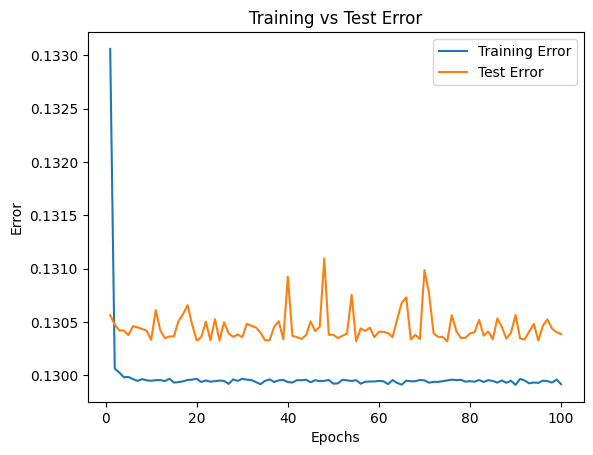

In [19]:
model = build_model()
history = model.fit(xtrain, ytrain, epochs=100, validation_data=(xtest, ytest), verbose=1)

train_losses = history.history['loss']
test_losses = history.history['val_loss']

model.fit(xtrain, ytrain, epochs=100)


epochs = range(1, len(train_losses) + 1)
plt.plot(epochs, train_losses, label='Training Error')
plt.plot(epochs, test_losses, label='Test Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training vs Test Error')
plt.legend()
plt.show()

# Modifying target to be a binary classification task, instead of classification across 5 columns

In [82]:
y = df['NERVOUS'] + df['DANGEROUS'] + df['SCARED']
X = df.drop(['NORMAL', 'FRIENDLY', 'NERVOUS', 'DANGEROUS', 'SCARED'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [23]:
# initial test
mod = LogisticRegression()
mod.fit(X_train,y_train)
yhat_train = mod.predict(X_train)
yhat_test = mod.predict(X_test)
print('Train Accuracy: ' + str(accuracy_score(y_train, yhat_train)))
print('Test Accuracy: ' + str(accuracy_score(y_test, yhat_test)))

Train Accuracy: 0.769951751957605
Test Accuracy: 0.7723539725016149


# Tuning

In [34]:
# class weight
mod = LogisticRegression(class_weight='balanced')
mod.fit(X_train,y_train)
yhat_train = mod.predict(X_train)
yhat_test = mod.predict(X_test)
print('Train Accuracy: ' + str(accuracy_score(y_train, yhat_train)))
print('Test Accuracy: ' + str(accuracy_score(y_test, yhat_test)))

Train Accuracy: 0.5602309578422843
Test Accuracy: 0.5516286795238534


In [37]:
# fit_intercept
mod = LogisticRegression(fit_intercept=True)
mod.fit(X_train,y_train)
yhat_train = mod.predict(X_train)
yhat_test = mod.predict(X_test)
print('Train Accuracy: ' + str(accuracy_score(y_train, yhat_train)))
print('Test Accuracy: ' + str(accuracy_score(y_test, yhat_test)))
print('---')
mod = LogisticRegression(fit_intercept=False)
mod.fit(X_train,y_train)
yhat_train = mod.predict(X_train)
yhat_test = mod.predict(X_test)
print('Train Accuracy: ' + str(accuracy_score(y_train, yhat_train)))
print('Test Accuracy: ' + str(accuracy_score(y_test, yhat_test)))

Train Accuracy: 0.769951751957605
Test Accuracy: 0.7723539725016149
---
Train Accuracy: 0.769951751957605
Test Accuracy: 0.7723539725016149


In [259]:
# Regularization Strength (C=1/reg)
regs = np.logspace(-4, 6, 100)
train_accuracy = []
test_accuracy = []
for reg in regs:
    train = []
    test = []
    mod = LogisticRegression(C=reg, max_iter=300)
    mod.fit(X_train,y_train)
    yhat_train = mod.predict(X_train)
    yhat_test = mod.predict(X_test)
    train_accuracy += [accuracy_score(y_train, yhat_train)]
    test_accuracy += [accuracy_score(y_test, yhat_test)]

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

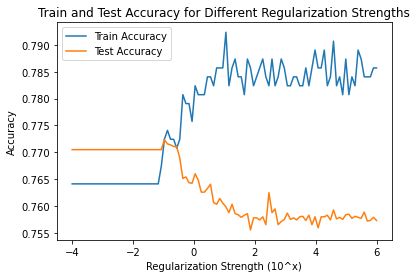

In [260]:
plt.plot(np.linspace(-4, 6, 100), train_accuracy, label='Train Accuracy')
plt.plot(np.linspace(-4, 6, 100), test_accuracy, label='Test Accuracy')
plt.xlabel('Regularization Strength (10^x)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Test Accuracy for Different Regularization Strengths')
plt.show()